# Übersicht über den Datensatz

- Datum: Format dd.mm.yyyy format von 01,01,2022 bis 01.12.2022
- Produktuntergruppencode: Kategorien der Produkte, Basismodul und Online Upgrade
- Coupon Eingeloest: Gibt an, ob bei dieser Transaktion ein Rabattcoupon verwendet wurde oder nicht. Wahr bedeutet, dass ein Coupon genutzt wurde. Falsch bedeutet, dass kein Coupon eingesetzt wurde. Beim Online Upgrade gibt kein Coupon
- Outbound: Könnte darauf hinweisen, ob die Aktion durch ein Outbound-Marketing (z. B. Newsletter, Anrufe) initiiert wurde. Wahr steht für Outbound, Falsch für Inbound (z. B. Kunde kam von sich aus).   

# Mögliche Businees Tasks

- Welche Produkte haben die höchste Zielwert? 
- Die Auswirkung der Verwendung von Coupons und Outbound-Aktionen auf den Verkauf

# Zusammenfassung

#### 1. Häufige Zielwerte und Produkte
- Der Großteil der Zielwerte liegt bei 192 (1913 Transaktionen) und 72 (1154 Transaktionen). Welche Produkte oder Produktkategorien sind mit diesen Zielwerten verbunden?
#### 2. Saisonalität der Transaktionen
- Die meisten Transaktionen im Januar (576) und November (474). Deutliche Anstiege im Januar, Juni und November. Was verursacht diese saisonalen Schwankungen?
#### 3. Auswirkung von Outbound-Aktionen
- Ohne Outbound werden mehr Transaktionen durchgeführt. 
- Der Gesamtzielwert ohne Outbound ist ebenfalls höher, außer im Juni (starker Anstieg durch Outbound). 
- Der durchschnittliche Zielwert mit Outbound ist jedoch deutlich höher. 
- **Interpretation:** Outbound-Kampagnen scheinen gezielt auf weniger, aber wertvollere Transaktionen abzuzielen, während die Masse der Transaktionen ohne Outbound generiert wird.
#### 4. Effekt von Coupons
- MMit Coupon gibt es mehr Transaktionen und einen höheren Gesamtzielwert.
- Im ersten Halbjahr 2022 ist der durchschnittliche Zielwert ohne Coupon höher, ab Juni ist es umgekehrt.
- **Interpretation:** Coupons sind effektiv, um mehr Transaktionen und höheren Gesamtzielwert zu generieren. Der Wechsel vom Trend des der durchschnittlichen Zielwertes im Juni könnte auf eine Änderung der Coupon-Strategie oder Marktbedingungen hinweisen.

# Vorschlag

- Konzentrieren sich genau darauf, was im Juni getan wurde, um eine so gute Leistung zu erzielen (welche Coupons wurden damals angeboten? Wie wurde der Outbound durchgeführt?)

# 1. Import Data and Package

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
sales = pd.read_excel("datensatz.xlsx",thousands='.',decimal=',',parse_dates=['Datum'])
sales.head()

,Arr Id,Datum,Produktuntergruppencode (Gruppe),Coupon Eingeloest,Outbound,Zielwert
0,01_01_2022_1027,01.01.2022,Basismodul,Falsch,Falsch,192
1,01_01_2022_1028,01.01.2022,Basismodul,Falsch,Falsch,300
2,01_01_2022_1033,01.01.2022,Basismodul,Falsch,Falsch,192
3,01_01_2022_1034,01.01.2022,Basismodul,Falsch,Falsch,120
4,01_01_2022_1035,01.01.2022,Basismodul,Falsch,Falsch,72


In [292]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347 entries, 0 to 4346
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Arr Id                            4344 non-null   object
 1   Datum                             4344 non-null   object
 2   Produktuntergruppencode (Gruppe)  4344 non-null   object
 3   Coupon Eingeloest                 3850 non-null   object
 4   Outbound                          4347 non-null   object
 5   Zielwert                          4347 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 203.9+ KB


In [293]:
sales.describe(include = 'all')

,Arr Id,Datum,Produktuntergruppencode (Gruppe),Coupon Eingeloest,Outbound,Zielwert
count,4344,4344,4344,3850,4347,4347.000000
unique,4344,334,2,2,2,NaN
top,01_01_2022_1027,28.11.2022,Basismodul,Wahr,Falsch,NaN
freq,1,52,3849,2475,2807,NaN
mean,NaN,NaN,NaN,NaN,NaN,211.910283
std,NaN,NaN,NaN,NaN,NaN,217.577713
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,72.000000
50%,NaN,NaN,NaN,NaN,NaN,192.000000
75%,NaN,NaN,NaN,NaN,NaN,192.000000


# 2. Cleaning Data

- Remove duplicates

In [294]:
# show dup 
sales_dup = sales[sales.duplicated(keep=False)]
sales_dup

,Arr Id,Datum,Produktuntergruppencode (Gruppe),Coupon Eingeloest,Outbound,Zielwert
3099,NaN,NaN,NaN,NaN,Wahr,192
3102,NaN,NaN,NaN,NaN,Wahr,192


In [295]:
# drop dup
sales = sales.drop_duplicates()

In [296]:
# count na
sales.isna().sum()

Arr Id                                2
Datum                                 2
Produktuntergruppencode (Gruppe)      2
Coupon Eingeloest                   496
Outbound                              0
Zielwert                              0
dtype: int64

- Remove NA

In [297]:
# show na
sales[sales["Arr Id"].isna() == True]

,Arr Id,Datum,Produktuntergruppencode (Gruppe),Coupon Eingeloest,Outbound,Zielwert
3099,NaN,NaN,NaN,NaN,Wahr,192
3225,NaN,NaN,NaN,Wahr,Wahr,192


In [298]:
# drop na
sales.dropna(subset = "Arr Id", inplace = True)

- Handle Date Column

In [299]:
sales['Datum'] = pd.to_datetime(sales['Datum'], format='%d.%m.%Y', errors='coerce')

- Handle Boolean Columns

In [300]:
sales['Outbound'] = sales['Outbound'].map({'Wahr': True, 'Falsch': False}).fillna(pd.NA)
sales['Coupon Eingeloest'] = sales['Coupon Eingeloest'].map({'Wahr': True, 'Falsch': False}).fillna(pd.NA)

- Remove leading and trailing empty spaces in Arr ID if they exist

In [301]:
sales['Arr Id'] = sales['Arr Id'].str.strip()

- Remove rows in December to avoid misinterpretation

In [302]:
sales = sales[sales['Datum'].dt.month != 12]

- Save the cleaned data

In [303]:
sales.sort_values(by = 'Datum',inplace = True)
sales

,Arr Id,Datum,Produktuntergruppencode (Gruppe),Coupon Eingeloest,Outbound,Zielwert
0,01_01_2022_1027,2022-01-01,Basismodul,False,False,192
1,01_01_2022_1028,2022-01-01,Basismodul,False,False,300
2,01_01_2022_1033,2022-01-01,Basismodul,False,False,192
3,01_01_2022_1034,2022-01-01,Basismodul,False,False,120
4,01_01_2022_1035,2022-01-01,Basismodul,False,False,72
...,...,...,...,...,...,...
4203,30_11_2022_1141,2022-11-30,Basismodul,True,False,72
4202,30_11_2022_1140,2022-11-30,Basismodul,True,False,192
4201,30_11_2022_1137,2022-11-30,Basismodul,True,False,192
4208,30_11_2022_1146,2022-11-30,Basismodul,True,True,192


In [304]:
sales.to_excel('clean_data.xlsx',index = False)

# 3. Analyze

In [305]:
sales.describe(include='all')

,Arr Id,Datum,Produktuntergruppencode (Gruppe),Coupon Eingeloest,Outbound,Zielwert
count,4332,4332,4332,3841,4332,4332.000000
unique,4332,NaN,2,2,2,NaN
top,01_01_2022_1027,NaN,Basismodul,True,False,NaN
freq,1,NaN,3841,2469,2798,NaN
mean,NaN,2022-06-07 01:14:47.534626048,NaN,NaN,NaN,211.934903
min,NaN,2022-01-01 00:00:00,NaN,NaN,NaN,0.000000
25%,NaN,2022-03-07 00:00:00,NaN,NaN,NaN,72.000000
50%,NaN,2022-06-01 00:00:00,NaN,NaN,NaN,192.000000
75%,NaN,2022-09-06 00:00:00,NaN,NaN,NaN,192.000000
max,NaN,2022-11-30 00:00:00,NaN,NaN,NaN,5400.000000


## 3.1 Zielwert Distribution

In [306]:
sales['Zielwert'].value_counts()

Zielwert
192     1908
72      1153
432      487
120      357
300      139
240      119
600       33
1188      33
756       31
0         18
1800      15
360        8
612        6
180        5
210        4
3000       3
1368       2
1428       2
372        1
5400       1
480        1
1812       1
996        1
3360       1
90         1
384        1
48         1
Name: count, dtype: int64

<Axes: xlabel='Zielwert'>

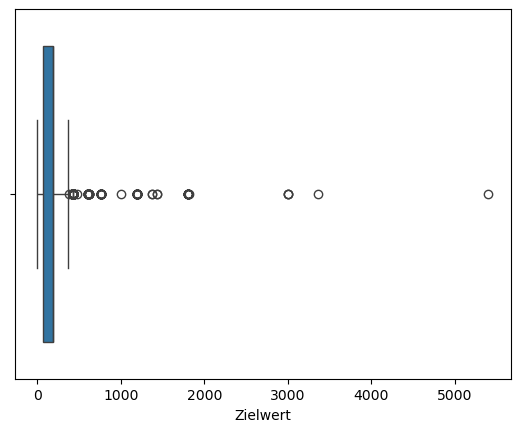

In [307]:
sns.boxplot(x = sales['Zielwert'])

<Axes: xlabel='Zielwert', ylabel='Count'>

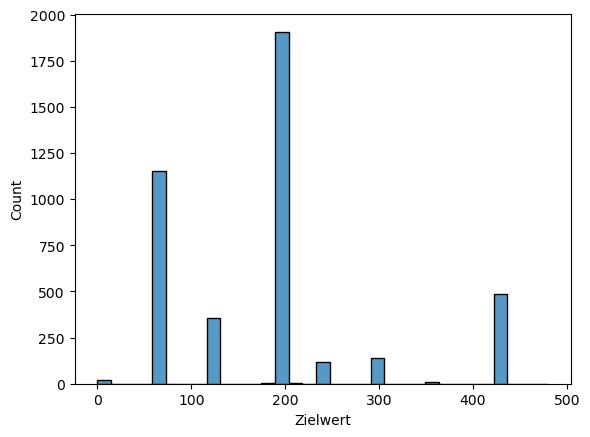

In [308]:
sns.histplot(sales[sales['Zielwert'] <= 500]['Zielwert'], kde=False)

- Der Großteil der Zielwerte der Transaktionen hat einen Wert von 192(1913) und 72(1154)

## 3.2 Monthly Trends

In [309]:
sales['Month'] = sales['Datum'].dt.month
sales

,Arr Id,Datum,Produktuntergruppencode (Gruppe),Coupon Eingeloest,Outbound,Zielwert,Month
0,01_01_2022_1027,2022-01-01,Basismodul,False,False,192,1
1,01_01_2022_1028,2022-01-01,Basismodul,False,False,300,1
2,01_01_2022_1033,2022-01-01,Basismodul,False,False,192,1
3,01_01_2022_1034,2022-01-01,Basismodul,False,False,120,1
4,01_01_2022_1035,2022-01-01,Basismodul,False,False,72,1
...,...,...,...,...,...,...,...
4203,30_11_2022_1141,2022-11-30,Basismodul,True,False,72,11
4202,30_11_2022_1140,2022-11-30,Basismodul,True,False,192,11
4201,30_11_2022_1137,2022-11-30,Basismodul,True,False,192,11
4208,30_11_2022_1146,2022-11-30,Basismodul,True,True,192,11


In [310]:
transaction_counts = sales.groupby('Month').size().reset_index(name='Transaction Count')

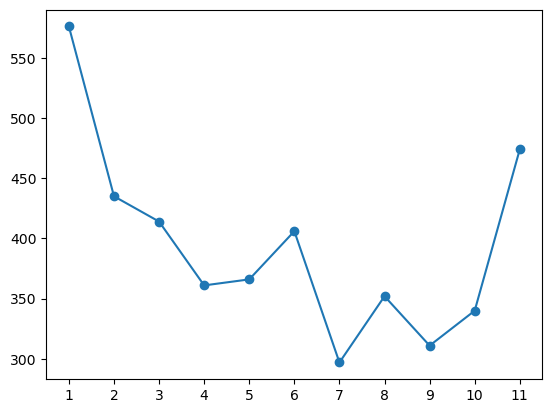

In [311]:
plt.plot(transaction_counts['Month'].astype(str), transaction_counts['Transaction Count'], marker='o', linestyle='-')


- Im Jahr 2022 hat das Unternehmen die meisten Transaktionen im Januar(576) und November(474).
- Die Zahl der Transaktionen stieg zu Beginn, Mitte und Ende des Jahres deutlich an

### 3.2.1 Outbound

In [312]:
transaction_counts_outbound = sales.groupby(['Month','Outbound']).size().reset_index(name='Transaction Count')

<Axes: xlabel='Month', ylabel='Transaction Count'>

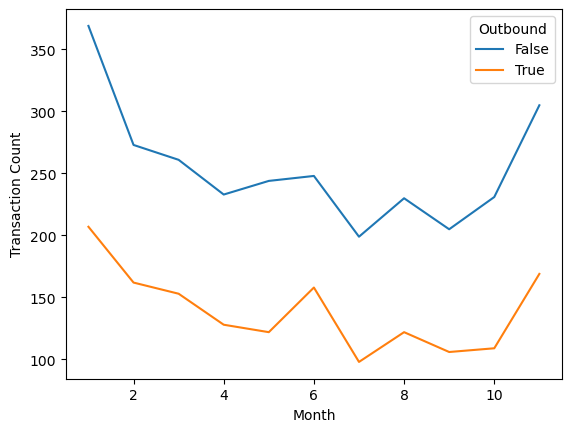

In [313]:
sns.lineplot(transaction_counts_outbound,x='Month',y='Transaction Count',hue='Outbound')

- Wenn Outbound nicht verwendet wird, werden mehr Transaktionen durchgeführt

In [314]:
zielwert_outbound = sales.groupby(['Month','Outbound']).sum('Zielwert')

<Axes: xlabel='Month', ylabel='Zielwert'>

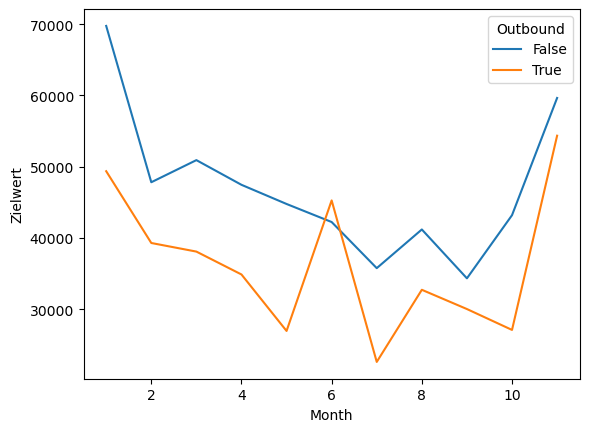

In [315]:
sns.lineplot(zielwert_outbound,x='Month',y='Zielwert',hue='Outbound')

- Das gleiche Phänomen ist im Gesamtzielwert zu beobachten, mit der Ausnahme, dass der Zielwert im Juni stark anstieg, als der Outbound eingeführt wurde. 

In [316]:
avg_zielwert_outbound = sales.groupby(['Month','Outbound']).mean('Zielwert')

<Axes: xlabel='Month', ylabel='Zielwert'>

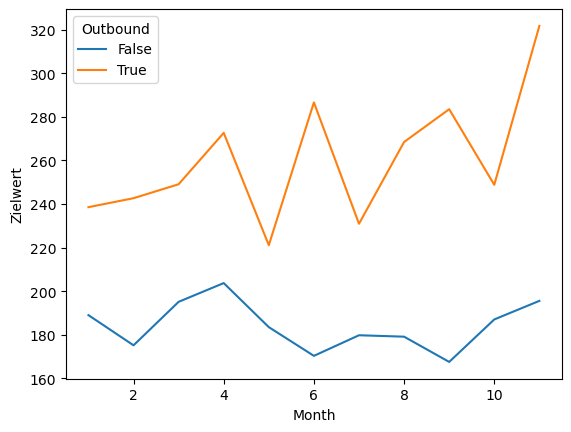

In [317]:
sns.lineplot(avg_zielwert_outbound,x='Month',y='Zielwert',hue='Outbound')

- Der durchschnittliche Zielwert von Transaktionen mit Outbound-Anwendung liegt deutlich über dem durchschnittlichen Zielwert von Transaktionen ohne Outbound-Anwendung

### 3.2.3 Coupon 

In [318]:
transaction_counts_coupon = sales.groupby(['Month','Coupon Eingeloest']).size().reset_index(name='Transaction Count')

<Axes: xlabel='Month', ylabel='Transaction Count'>

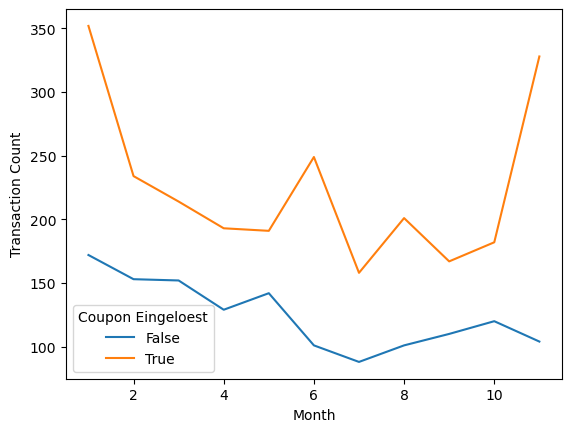

In [319]:
sns.lineplot(transaction_counts_coupon,x='Month',y='Transaction Count',hue='Coupon Eingeloest')

- Mit dem Coupon werden mehr Transaktionen durchgeführt als ohne Coupon

In [320]:
zielwert_coupon = sales.groupby(['Month','Coupon Eingeloest']).sum('Zielwert')

<Axes: xlabel='Month', ylabel='Zielwert'>

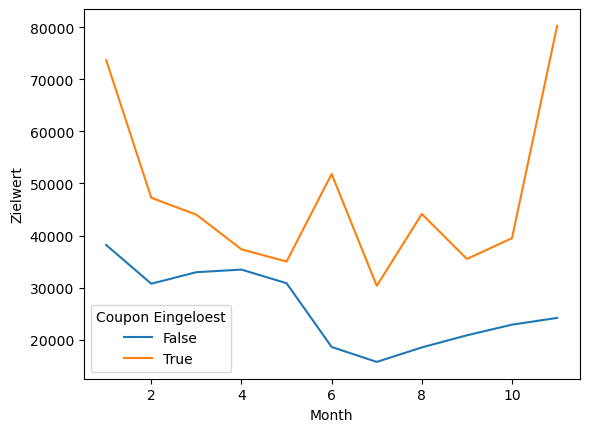

In [321]:
sns.lineplot(zielwert_coupon,x='Month',y='Zielwert',hue='Coupon Eingeloest')

- Auch der Gesamtzielwert von Transaktionen mit eingesetzten Coupons ist höher als bei Transaktionen ohne Coupons

In [322]:
avg_zielwert_coupon = sales.groupby(['Month','Coupon Eingeloest']).mean('Zielwert')

<Axes: xlabel='Month', ylabel='Zielwert'>

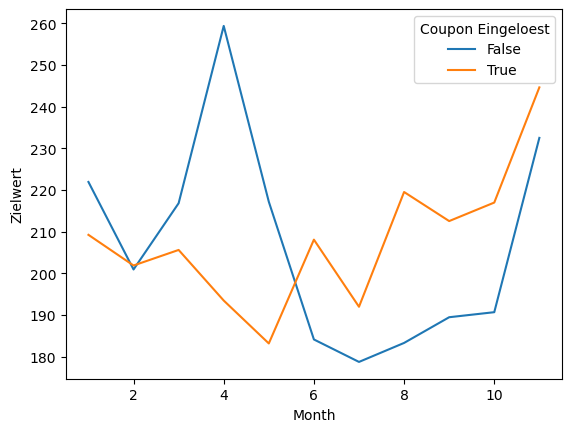

In [323]:
sns.lineplot(avg_zielwert_coupon,x='Month',y='Zielwert',hue='Coupon Eingeloest')

- Im ersten Halbjahr 2022 ist der durchschnittliche Zielwert von Transaktionen ohne Kupon höher als der durchschnittliche Zielwert von Transaktionen mit Kupon. Aber ab Juni ist das Gegenteil der Fall